<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Axial_Length_Prediction_ML_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Import dataset from google drive

In [57]:
dataset = pd.read_excel('/content/drive/MyDrive/IOLP studykhkval.xlsx')

## Explore the dataset

In [58]:
# find rows and columns
dataset.shape

(108, 3)

In [59]:
# find first 5 rows and columns
dataset.head()

,KH,KV,AL
0,41.5,40.50,20.30
1,41.5,40.50,20.56
2,41.5,40.50,20.61
3,41.5,40.75,20.79
4,42.0,41.00,21.10


In [60]:
# find last 5 rows and columns
dataset.tail()

,KH,KV,AL
103,47.25,47.0,23.90
104,47.50,47.5,24.00
105,47.50,47.5,24.04
106,47.75,48.0,24.08
107,47.75,48.5,24.20


In [61]:
# find descriptive statistics
dataset.describe()

,KH,KV,AL
count,108.000000,108.000000,108.000000
mean,44.756481,44.129167,22.704167
std,1.551636,1.760219,0.791164
min,41.500000,40.500000,20.300000
25%,43.500000,42.750000,22.305000
50%,44.750000,44.000000,22.775000
75%,46.000000,45.500000,23.222500
max,47.750000,48.500000,24.200000


Text(0.5, 1.0, 'Dataset scatter plot')

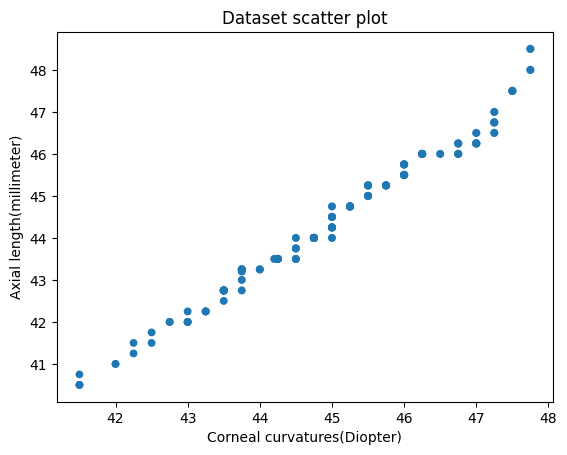

In [62]:
# plotting scatter plots for visualising the data distribution
plt.scatter(dataset.KH, dataset.KV, dataset.AL)
plt.xlabel('Corneal curvatures(Diopter)')
plt.ylabel('Axial length(millimeter)')
plt.title('Dataset scatter plot')

<Axes: >

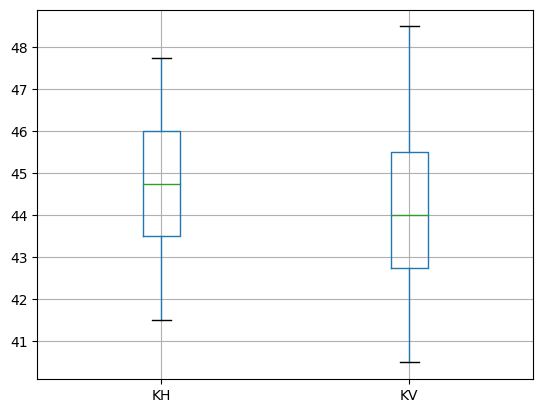

In [63]:
# creating Box and Whiskers plots for corneal curvatures
dataset.boxplot(['KH','KV'])

<Axes: >

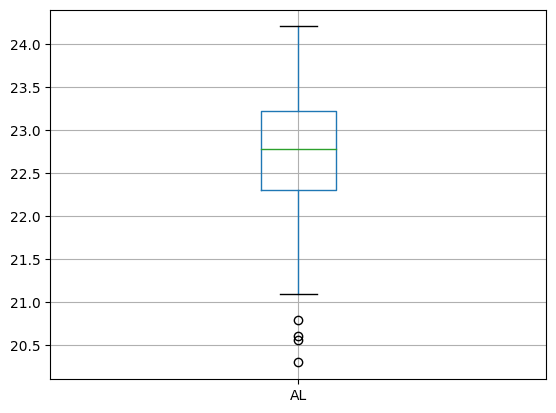

In [64]:
# creating Box and Whiskers plots for axial length
dataset.boxplot(['AL'])

<Axes: >

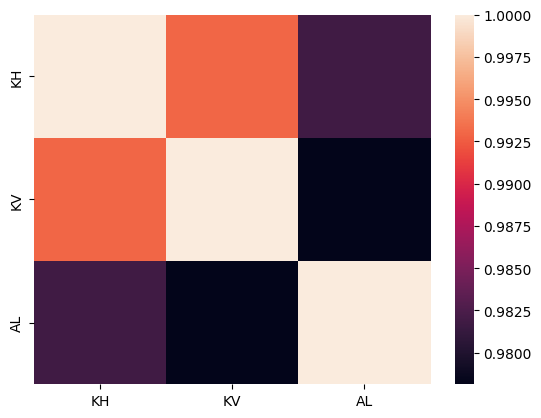

In [66]:
# constucting heat map for correlation matrix
sns.heatmap(dataset.corr())

In [67]:
dataset.corr()

,KH,KV,AL
KH,1.000000,0.992922,0.981874
KV,0.992922,1.000000,0.978135
AL,0.981874,0.978135,1.000000


## Define X and y as independant and dependant variable

In [68]:
X = dataset.drop(['AL'], axis=1).values
y = dataset['AL'].values

## Split the dataset into training and testing set

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)


## Fit the model for training by LinearRegression Algorithm

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

## Visualize the predicted y values (Axial length)

In [ ]:
y_pred = model.predict(X_test)
y_pred

## Look for the coefficients of X1 and X2 values (independant variables)

In [72]:
print(model.coef_)

[0.32984876 0.14595338]


## Look for the model intercept (Slope)

In [74]:
print(model.intercept_)

1.5103816265249073


## Predict the axial length for the given new set of horizontal and vertical curvatures

In [75]:
model.predict([[44.75,	45.25]])

array([22.87550416])

## Evaluate the model for the Accuracy

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9743533596736988

## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted axial length')

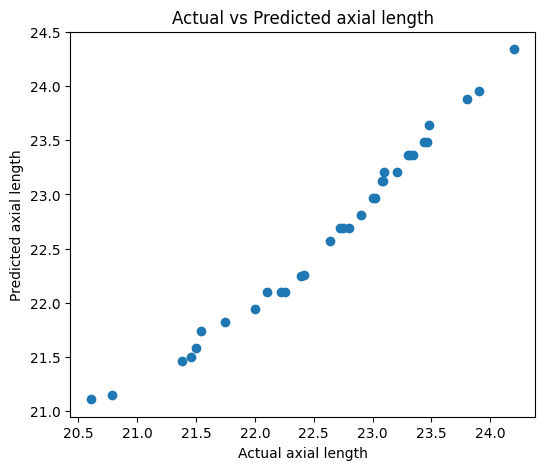

In [77]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual axial length')
plt.ylabel('Predicted axial length')
plt.title('Actual vs Predicted axial length')

## Actual and predicted values difference

In [78]:
pred_y_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred,
                         'Difference': y_test-y_pred})
pred_y_df[0:20]

,Actual value,Predicted value,Difference
0,23.30,23.360792,-0.060792
1,21.54,21.741458,-0.201458
2,23.09,23.122891,-0.032891
3,20.61,21.110217,-0.500217
4,22.22,22.098310,0.121690
5,23.80,23.882568,-0.082568
6,24.20,24.339399,-0.139399
7,21.46,21.503557,-0.043557
8,22.00,21.942871,0.057129
9,23.34,23.360792,-0.020792


# prediction model regression equation
## y = m1*X1 + m2*X2 +b
## predicted axial length (y) = m1*KH+m2*KV+b
## y = 0.329*KH + 0.146*KV + 1.510

# Thank you so very much